In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet


In [14]:
# Cargar los datos
datos = pd.read_excel("mensuales.xlsx")
datos.columns = ['Fecha', 'Precipitacion']
datos.set_index('Fecha', inplace=True)
print(datos.head())

            Precipitacion
Fecha                    
1982-01-01          766.0
1982-02-01         2718.0
1982-03-01         1331.0
1982-04-01         4939.0
1982-05-01         6078.0


In [15]:
# Preparar los datos para Prophet
datos_prophet = datos.reset_index()
datos_prophet.columns = ['ds', 'y']


In [16]:
# Dividir en conjuntos de entrenamiento y prueba
train_size = int(len(datos_prophet) * 0.8)
train_data, test_data = datos_prophet[:train_size], datos_prophet[train_size:]


In [30]:
# Ajustar el modelo Prophet
model_prophet = Prophet()
model_prophet.fit(datos_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0anb6nf8/ehumbwes.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0anb6nf8/eok3vjyu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17570', 'data', 'file=/tmp/tmp0anb6nf8/ehumbwes.json', 'init=/tmp/tmp0anb6nf8/eok3vjyu.json', 'output', 'file=/tmp/tmp0anb6nf8/prophet_modelckhm4rhg/prophet_model-20240620222850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:28:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:28:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [41]:
# Hacer predicciones para los próximos 12 meses
future = model_prophet.make_future_dataframe(periods=12, freq='M')
forecast = model_prophet.predict(future)


In [42]:
print(forecast.tail())

            ds        trend   yhat_lower   yhat_upper  trend_lower  \
500 2023-08-31  3995.830740   510.543846  6203.454012  3993.585749   
501 2023-09-30  4003.388532  1793.606700  7912.501685  4000.351803   
502 2023-10-31  4011.198251   847.898017  6520.990445  4007.376928   
503 2023-11-30  4018.756044   682.008758  6453.361412  4014.425935   
504 2023-12-31  4026.565763  -797.162689  5071.630533  4021.330057   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
500  3997.905971     -772.860420           -772.860420           -772.860420   
501  4006.306642      937.339268            937.339268            937.339268   
502  4015.104701     -384.379567           -384.379567           -384.379567   
503  4023.634800     -368.212521           -368.212521           -368.212521   
504  4032.619240    -1707.616982          -1707.616982          -1707.616982   

          yearly  yearly_lower  yearly_upper  multiplicative_terms  \
500  -772.860420   -772.8604

In [45]:
# Filtrar las predicciones para el año 2023
forecast_2023 = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2024-12-31')]

# Filtrar los datos reales para el año 2023
datos_2023 = datos[datos.index.year == 2023]
print(datos_2023)

Empty DataFrame
Columns: [Precipitacion]
Index: []


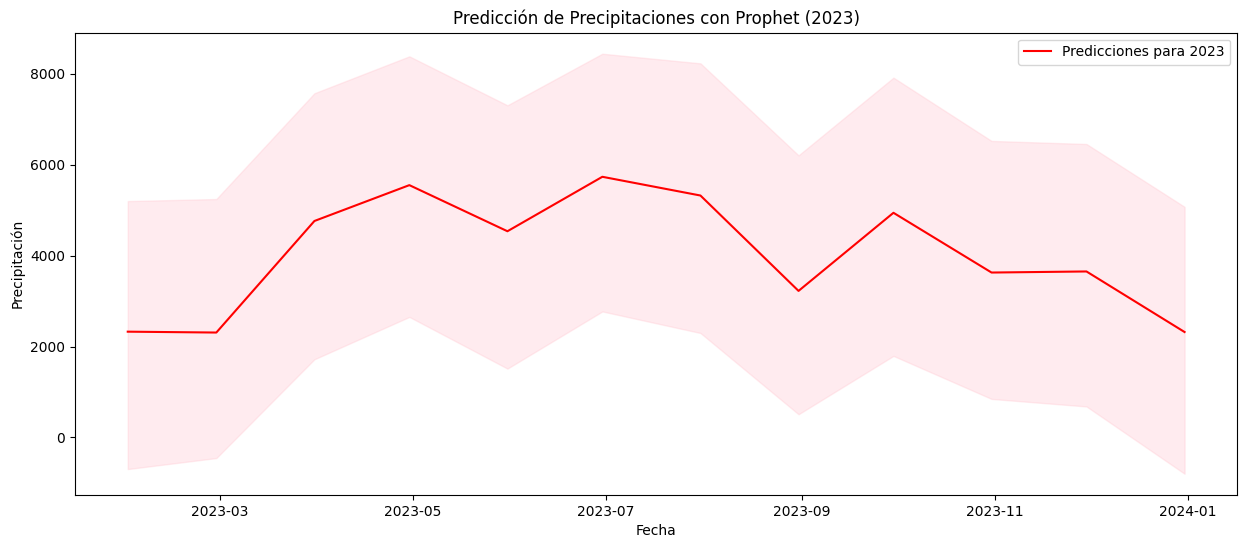

In [46]:
# Graficar los resultados solo para el año 2023
plt.figure(figsize=(15, 6))
if not datos_2023.empty:
    plt.plot(datos_2023.index, datos_2023['Precipitacion'], label='Datos reales')
plt.plot(forecast_2023['ds'], forecast_2023['yhat'], label='Predicciones para 2023', color='red')
plt.fill_between(forecast_2023['ds'], forecast_2023['yhat_lower'], forecast_2023['yhat_upper'], color='pink', alpha=0.3)
plt.title('Predicción de Precipitaciones con Prophet (2023)')
plt.xlabel('Fecha')
plt.ylabel('Precipitación')
plt.legend()
plt.show()

In [47]:
# Mostrar los resultados en una tabla
resultados_df = forecast_2023[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
resultados_df.columns = ['Fecha', 'Predicción', 'Intervalo Inferior', 'Intervalo Superior']
print(resultados_df)

         Fecha   Predicción  Intervalo Inferior  Intervalo Superior
493 2023-01-31  2326.498231         -694.557002         5198.140760
494 2023-02-28  2307.384520         -452.363263         5243.057967
495 2023-03-31  4760.487534         1719.623949         7569.630045
496 2023-04-30  5548.833303         2651.039669         8380.755635
497 2023-05-31  4534.869455         1514.719540         7303.823265
498 2023-06-30  5732.375973         2771.511501         8438.582253
499 2023-07-31  5320.381823         2297.507828         8226.745968
500 2023-08-31  3222.970320          510.543846         6203.454012
501 2023-09-30  4940.727801         1793.606700         7912.501685
502 2023-10-31  3626.818684          847.898017         6520.990445
503 2023-11-30  3650.543523          682.008758         6453.361412
504 2023-12-31  2318.948782         -797.162689         5071.630533
